This is a Model that predicts if a customer acquires a LOAN  or Not from the bank, given certain features such as the credit history, Education, Income of the applicants et cetera.# 

### 1. Import the required Libraries

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
import sklearn
from itertools import permutations
warnings.filterwarnings('ignore')

### 2. Import the Datasets.

In [2]:
#Import Dataset
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [3]:
print("Data shape of df1 is",df1.shape)
print("Data shape of df2 is",df2.shape)

Data shape of df1 is (367, 12)
Data shape of df2 is (614, 13)


### 3. Data Preprocessing

In [4]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df1.Dependents = pd.to_numeric(df1.Dependents, errors='coerce')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           317 non-null float64
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


#### Now we are going to fill in missing values.
For the numerical values we will replace the missing value with the mean that is the average of the entries within that column.
For the strings we will use the mode that is the value that appears the most within that column.

In [7]:
df1["Gender"].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [8]:
df1["Gender"] = df1["Gender"].fillna(value="Male")
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           50
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
df1["Self_Employed"].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [10]:
df1["Self_Employed"] = df1["Self_Employed"].fillna(value="No")

In [11]:
df1["Dependents"] = df1["Dependents"].fillna(round(df1["Dependents"].mean()))

In [12]:
df1["LoanAmount"] = df1["LoanAmount"].fillna(round(df1["LoanAmount"].mean()))

In [13]:
df1["Loan_Amount_Term"] = df1["Loan_Amount_Term"].fillna(round(df1["Loan_Amount_Term"].mean()))

In [14]:
df1["Credit_History"].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [15]:
df1["Credit_History"] = df1["Credit_History"].fillna(value="1.0")

In [16]:
df1.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [17]:
df1['Loan_Status'] = 0

##### For the second data set, we follow the same steps we did above.

In [18]:
df2.Dependents = pd.to_numeric(df2.Dependents, errors='coerce')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           548 non-null float64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


In [19]:
df2["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
df2["Gender"] = df2["Gender"].fillna(value="Male")

In [21]:
df2["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
df2["Married"] = df2["Married"].fillna(value="Yes")

In [23]:
df2["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df2["Self_Employed"] = df2["Self_Employed"].fillna(value="No")

In [25]:
df2["Loan_Amount_Term"] = df2["Loan_Amount_Term"].fillna(round(df2["Loan_Amount_Term"].mean()))

In [26]:
df2["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
df2["Credit_History"] = df2["Credit_History"].fillna(value="1.0 ")

In [28]:
df2["Dependents"] = df2["Dependents"].fillna(round(df2["Dependents"].mean()))

In [29]:
df2["LoanAmount"] = df2["LoanAmount"].fillna(round(df2["LoanAmount"].mean()))

In [30]:
df2.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [55]:
df1 = df1.drop(columns = 'Loan_ID')
df2 = df2.drop(columns = 'Loan_ID')

#### Combining the Datasets

In [57]:
df = pd.concat([df1, df2], axis=0)
df.shape

(981, 12)

In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dependents,981.0,0.607543,0.751803,0.0,0.0,0.0,1.0,2.0
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,981.0,142.556575,76.350963,9.0,101.0,128.0,160.0,700.0
Loan_Amount_Term,981.0,342.203874,64.432921,6.0,360.0,360.0,360.0,480.0


In [34]:
#finding the data types of each column and checking for null
dtypes = df.dtypes
na = df.isna() == True
sum_na_ = na.sum()
percent_na = (sum_na_ * 100 / len(df)).round(2)
info = pd.concat([sum_na_,percent_na,dtypes],axis = 1,keys = ['NullSum','percentage','type'])
info

,NullSum,percentage,type
Loan_ID,0,0.0,object
Gender,0,0.0,object
Married,0,0.0,object
Dependents,0,0.0,float64
Education,0,0.0,object
Self_Employed,0,0.0,object
ApplicantIncome,0,0.0,int64
CoapplicantIncome,0,0.0,float64
LoanAmount,0,0.0,float64
Loan_Amount_Term,0,0.0,float64


In [35]:
numerical = df.select_dtypes(exclude = 'object')
categorical = df.select_dtypes(include = 'object')

categorical.drop( 'Loan_ID', axis = 1, inplace = True)

In [36]:
numerical.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Dependents,1.000000,0.051115,0.004000,0.107448,-0.057855
ApplicantIncome,0.051115,1.000000,-0.114247,0.547031,-0.023046
CoapplicantIncome,0.004000,-0.114247,1.000000,0.178231,-0.043675
LoanAmount,0.107448,0.547031,0.178231,1.000000,0.054483
Loan_Amount_Term,-0.057855,-0.023046,-0.043675,0.054483,1.000000


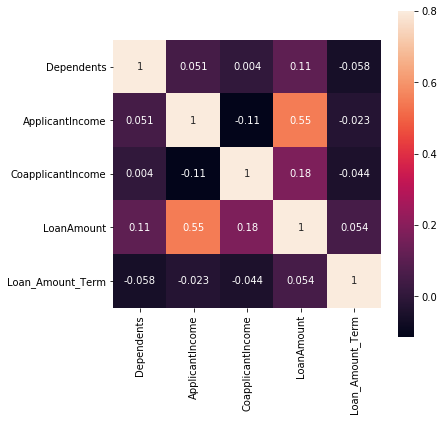

In [37]:
# correlation heat map
correlation_matrix = numerical.corr()
fig = plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot = True)
plt.show()

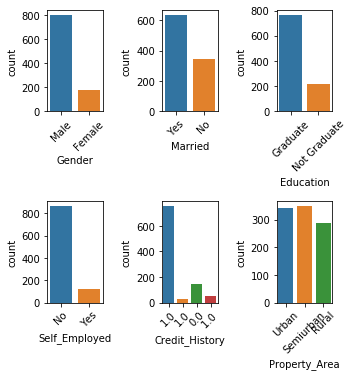

In [38]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(5, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

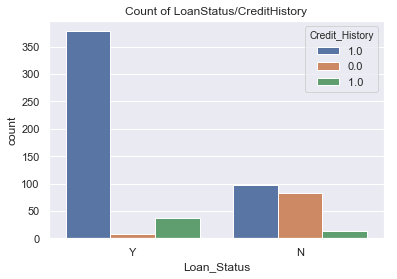

In [49]:
#Count of males & females scheduled for appointment
plt.title('Count of LoanStatus/CreditHistory')
sns.set(style="darkgrid")
sns.countplot(x = 'Loan_Status', hue='Credit_History', data = df2)

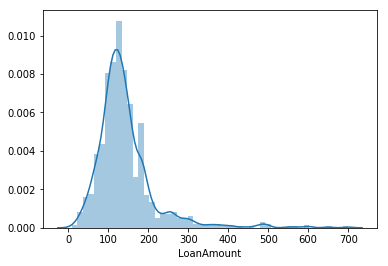

In [39]:
sns.distplot(df['LoanAmount'])

In [ ]:
dfd = pd.crosstab(df['LoanAmount'], df['ApplicantIncome'])
dfd.div(dfd.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))
plt.title('comparison of loan amount vs applicant income')

Normalization using the Min-Max method.

In [41]:
df_norm = df
df_norm.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0.0,110.0,360,1,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500.0,126.0,360,1,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800.0,208.0,360,1,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546.0,100.0,360,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0.0,78.0,360,1,Urban


In [45]:
df_norm["ApplicantIncome"] = (df_norm["ApplicantIncome"]-df_norm["ApplicantIncome"].min()) / (df_norm["ApplicantIncome"].max()-df_norm["ApplicantIncome"].min())

In [46]:
df_norm["Dependents"] = (df_norm["Dependents"]-df_norm["Dependents"].min()) / (df_norm["Dependents"].max()-df_norm["Dependents"].min())

In [47]:
df_norm["CoapplicantIncome"] = (df_norm["CoapplicantIncome"]-df_norm["CoapplicantIncome"].min()) / (df_norm["CoapplicantIncome"].max()-df_norm["CoapplicantIncome"].min())

In [48]:
df_norm["LoanAmount"] = (df_norm["LoanAmount"]-df_norm["LoanAmount"].min()) / (df_norm["LoanAmount"].max()-df_norm["LoanAmount"].min())

In [49]:
df_norm.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,0.070617,0.000000,0.146165,360,1,Urban
1,LP001022,Male,Yes,0.5,Graduate,No,0.037975,0.036000,0.169320,360,1,Urban
2,LP001031,Male,Yes,1.0,Graduate,No,0.061728,0.043200,0.287988,360,1,Urban
3,LP001035,Male,Yes,1.0,Graduate,No,0.028889,0.061104,0.131693,360,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,0.040444,0.000000,0.099855,360,1,Urban


In [58]:
df_norm.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,totalincome
count,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.303772,0.063948,0.038446,0.193280,0.102394
std,0.375902,0.070310,0.065250,0.110493,0.090293
min,0.000000,0.000000,0.000000,0.000000,0.017802
25%,0.000000,0.035494,0.000000,0.133140,0.058141
50%,0.000000,0.046914,0.026640,0.172214,0.082648
75%,0.500000,0.068099,0.056760,0.218524,0.114813
max,1.000000,1.000000,1.000000,1.000000,1.005136


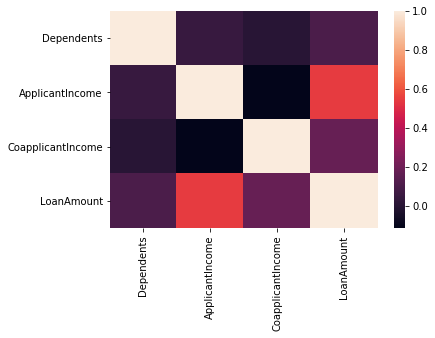

In [50]:
sns.heatmap(df_norm.corr())

Binning

### 4. Exploratory Data Analysis

Descriptive Statistics

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dependents,981.0,0.607543,0.751803,0.0,0.0,0.0,1.0,2.0
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,981.0,142.556575,76.350963,9.0,101.0,128.0,160.0,700.0
Loan_Amount_Term,981.0,342.203874,64.432921,6.0,360.0,360.0,360.0,480.0


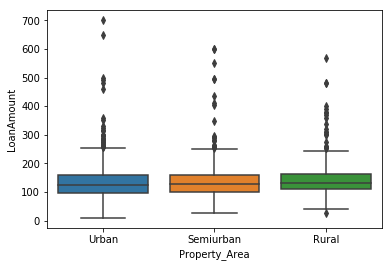

In [43]:
sns.boxplot (x="Property_Area", y="LoanAmount", data=df)

In [50]:
df_test = df[['Self_Employed', 'Education','LoanAmount','ApplicantIncome']]
df_test.head()

,Self_Employed,Education,LoanAmount,ApplicantIncome
0,No,Graduate,110.0,5720
1,No,Graduate,126.0,3076
2,No,Graduate,208.0,5000
3,No,Graduate,100.0,2340
4,No,Not Graduate,78.0,3276


In [51]:
df_grp = df_test.groupby(['Self_Employed', 'Education','LoanAmount'], as_index=False).mean()
df_grp 
#Note that those that are not self employed and not graduate have the lowest value
#and those that are self employed and graduate have the highest

,Self_Employed,Education,LoanAmount,ApplicantIncome
0,No,Graduate,9.0,2378.000000
1,No,Graduate,17.0,1299.000000
2,No,Graduate,26.0,5468.000000
3,No,Graduate,28.0,1173.000000
4,No,Graduate,30.0,2963.666667
5,No,Graduate,35.0,1516.000000
6,No,Graduate,36.0,3166.000000
7,No,Graduate,40.0,8091.800000
8,No,Graduate,42.0,3716.000000
9,No,Graduate,44.0,4907.500000


Analysis of Variance ANOVA

In [98]:
numerical.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [99]:
df_anova = df [['Loan_Amount_Term','LoanAmount']]

In [101]:
#grouped_anova = df_anova.groupb([['Loan_Amount_Term']])

In [69]:
#anova_results1 = stats.f_oneway (grouped_anova.get_group('180')['LoanAmount'], grouped_anova.get_group('360')['LoanAmount'])
#the reults will confirm what we guessed from the bar chart about the prices btw honda and subaru not significantly different

Correlation

(0, 85221.5770009304)

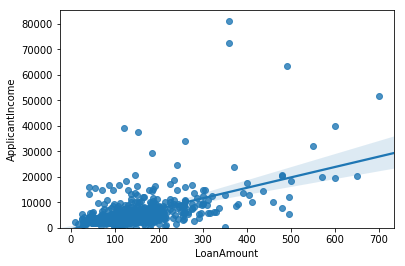

In [52]:
sns.regplot (x="LoanAmount", y="ApplicantIncome", data=df)
plt.ylim(0,)

### 5. Model Development/Evaluation

Import models from scikit-learn

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer, f1_score


In [59]:
x = df2.drop('Loan_Status', axis = 1)
y = df2.Loan_Status

One Hot Encoding

In [60]:
x = pd.get_dummies(x)
df1 = pd.get_dummies(df1)
df2 = pd.get_dummies(df2)

Split the data into random train and test subsets

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 19)
(429,)
(185, 19)
(185,)


Regression

In [64]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8041958041958042
Testing Accuracy : 0.8324324324324325


In [66]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7297297297297297


In [68]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9906759906759907
Testing Accuracy : 0.7783783783783784


In [69]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7621621621621621


In [70]:
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.43123543123543123
Testing Accuracy : 0.4


In [ ]:
The model appears to be a good fit.